pizza sales data:
https://www.kaggle.com/datasets/shilongzhuang/pizza-sales        
01/01/2015--12/31/2015	in the United States

This pizza sales dataset make up 12 relevant features:
> order_id: Unique identifier for each order placed by a table

> order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)

> pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price

> quantity: Quantity ordered for each pizza of the same type and size

> order_date: Date the order was placed (entered into the system prior to cooking & serving)

> order_time: Time the order was placed (entered into the system prior to cooking & serving)

> unit_price: Price of the pizza in USD

> total_price: unit_price * quantity

> pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)

> pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price

> pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not > specified; and they all include Tomato Sauce, unless another sauce is specified)

> pizza_name: Name of the pizza as shown in the menu


# import data and proprecessing

In [15]:
import pandas as pd

# Load the dataset
file_path = 'data/Data Model - Pizza Sales.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


**Check for Duplicates**

In [17]:
df.duplicated().sum()

0

**Check for Missing Values**

In [18]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

**Outlier handling**

In [19]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


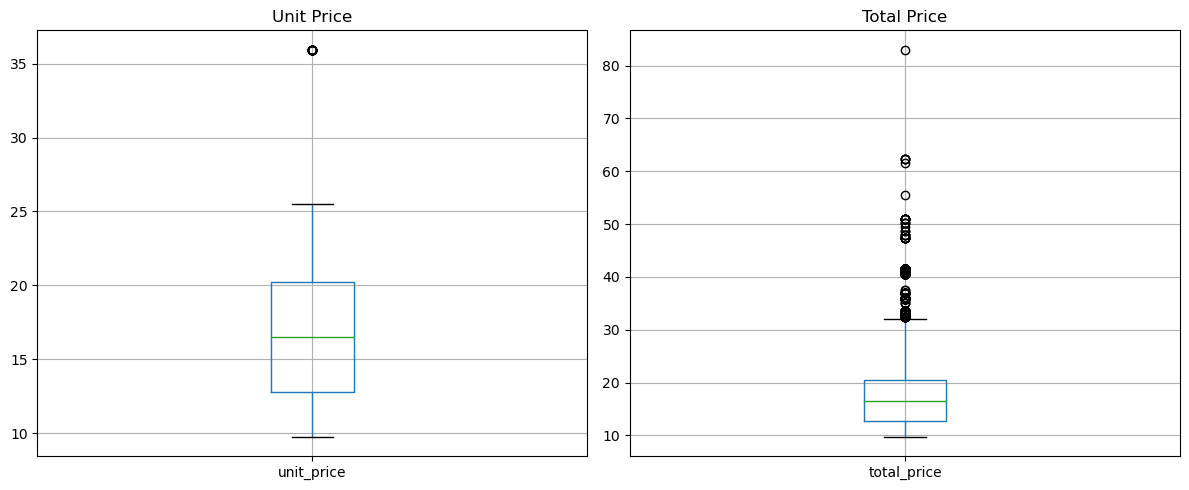

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df.boxplot(column='unit_price', ax=axes[0])
df.boxplot(column='total_price', ax=axes[1])

axes[0].set_title('Unit Price')
axes[1].set_title('Total Price')

plt.tight_layout()
plt.show()


In [21]:
# Calculate IQR for unit_price
Q1_unit = df['unit_price'].quantile(0.25)
Q3_unit = df['unit_price'].quantile(0.75)
IQR_unit = Q3_unit - Q1_unit

# Define bounds for outliers in unit_price
lower_bound_unit = Q1_unit - 1.5 * IQR_unit
upper_bound_unit = Q3_unit + 1.5 * IQR_unit

# Filter outliers in unit_price
outliers_unit_price = df[(df['unit_price'] < lower_bound_unit) | (df['unit_price'] > upper_bound_unit)]

# Display outliers
outliers_unit_price['pizza_id'].value_counts()

the_greek_xxl    28
Name: pizza_id, dtype: int64

In [22]:
outliers_unit_price.head(1)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
3447,3448,1528,the_greek_xxl,1,2015-01-26,15:24:38,35.95,35.95,XXL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza


the_greek_xxl is the most expensive and it price is $35.95 .

Only 28 orders were placed throughout the year, accounting for less than 0.1% of the total order volume of 48,620. 

Consider removing this product from the shelves

In [23]:
# Calculate IQR for total_price
Q1_total = df['total_price'].quantile(0.25)
Q3_total = df['total_price'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Define bounds for outliers in total_price
lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

# Filter outliers in total_price
outliers_total_price = df[(df['total_price'] < lower_bound_total) | (df['total_price'] > upper_bound_total)]

# Display outliers
outliers_total_price.sort_values(by='total_price',ascending=False)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
35496,35497,15674,cali_ckn_l,4,2015-09-19,14:16:35,20.75,83.00,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
183,184,78,spicy_ital_l,3,2015-01-02,12:28:14,20.75,62.25,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
38819,38820,17112,bbq_ckn_l,3,2015-10-17,12:56:31,20.75,62.25,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
18317,18318,8040,thai_ckn_l,3,2015-05-15,14:13:27,20.75,62.25,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
37638,37639,16619,prsc_argla_l,3,2015-10-08,12:19:53,20.75,62.25,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
7598,7599,3350,sicilian_m,2,2015-02-26,12:16:27,16.25,32.50,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
19386,19387,8522,sicilian_m,2,2015-05-23,13:25:32,16.25,32.50,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
19471,19472,8561,sicilian_m,2,2015-05-23,20:47:25,16.25,32.50,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
28131,28132,12384,sicilian_m,2,2015-07-26,13:28:46,16.25,32.50,M,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza


In [24]:
# Calculate the count of items and total price per order_id
items_count_per_order = outliers_total_price.groupby('order_id')['quantity'].sum()
total_price_per_order = outliers_total_price.groupby('order_id')['total_price'].sum()

# Get a list of unique pizzas per order_id
pizzas_per_order = outliers_total_price.groupby('order_id')['pizza_id'].unique()

# Since we can't directly execute the code, I'll describe how you could merge these results for a comprehensive view
results_df = pd.DataFrame({
    'Items_Count': items_count_per_order,
    'Total_Price': total_price_per_order,
    'Pizzas': pizzas_per_order
})

# Displaying a sample of the merged results
results_df.sort_values(by='Items_Count', ascending=False)

,Items_Count,Total_Price,Pizzas
order_id,,,
17171,7,127.65,"[bbq_ckn_m, four_cheese_l, spicy_ital_l]"
19411,7,106.50,"[big_meat_s, cali_ckn_m, five_cheese_l]"
18845,7,124.25,"[bbq_ckn_m, sicilian_m, thai_ckn_l]"
1096,6,118.40,"[four_cheese_l, napolitana_l, spicy_ital_l]"
20169,6,115.50,"[napolitana_l, southw_ckn_l, spicy_ital_m]"
...,...,...,...
18919,1,35.95,[the_greek_xxl]
2813,1,35.95,[the_greek_xxl]
2614,1,35.95,[the_greek_xxl]


Outliers are reasonable and do not need to be addressed

**Get price analysis data**

In [120]:
pizza_pricing = df[['pizza_id', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'unit_price']].drop_duplicates().sort_values(by='unit_price')
pizza_pricing

,pizza_id,pizza_size,pizza_category,pizza_ingredients,pizza_name,unit_price
77,pepperoni_s,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,9.75
93,hawaiian_s,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,10.50
127,pep_msh_pep_s,S,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza",11.00
19,mexicana_s,S,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,12.00
35,big_meat_s,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,12.00
...,...,...,...,...,...,...
3,ital_supr_l,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,20.75
175,ital_veggie_l,L,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,21.00
427,brie_carre_s,S,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",The Brie Carre Pizza,23.65
121,the_greek_xl,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza,25.50


In [ ]:
#pizza_pricing.to_csv("data/pizza_pricing.csv")

## Price analysis

#### EDA

In [148]:
# Group by order_id and sum the total_price for each order
order_values = df.groupby('order_id')['total_price'].sum()

# Calculate the average order value
average_order_value = order_values.mean()

print('\nCalculate the average order value:',average_order_value)


Calculate the average order value: 38.30726229508162


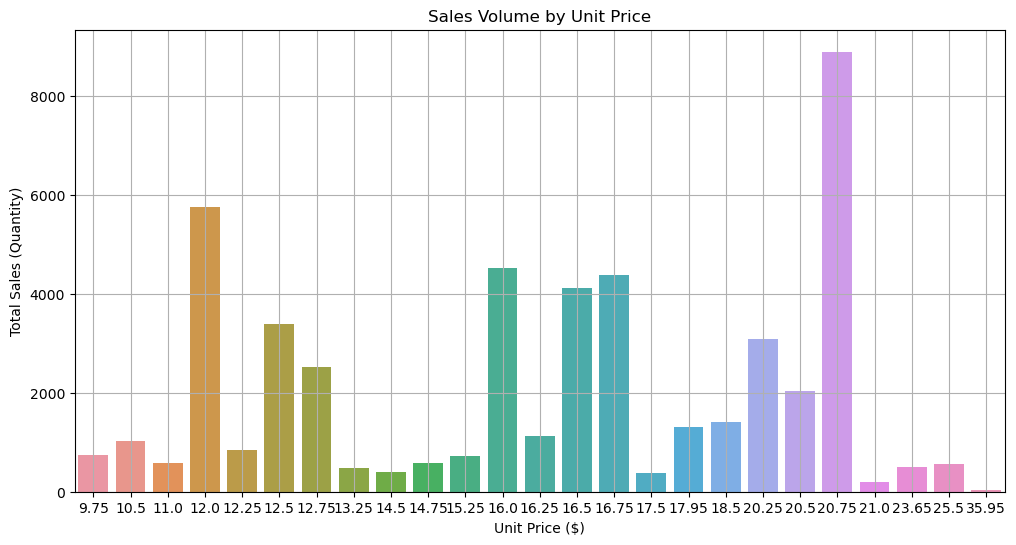

In [163]:
import seaborn as sns
# Further analysis on price vs sales volume
# We group by unit_price this time to get a more detailed view on how different prices impact sales volume
price_sales_volume = df.groupby('unit_price').agg(
    total_sales=('quantity', 'sum')
).reset_index().sort_values(by='unit_price')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=price_sales_volume, x='unit_price', y='total_sales')
plt.title('Sales Volume by Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Total Sales (Quantity)')
plt.grid(True)
plt.show()

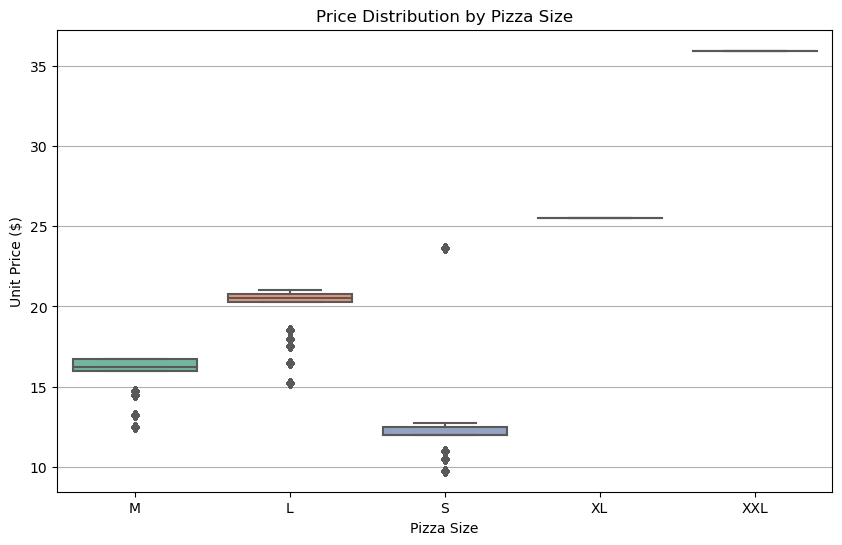

In [150]:
# Analysis on price distribution by pizza size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pizza_size', y='unit_price', palette='Set2')
plt.title('Price Distribution by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Unit Price ($)')
plt.grid(axis='y')
plt.show()

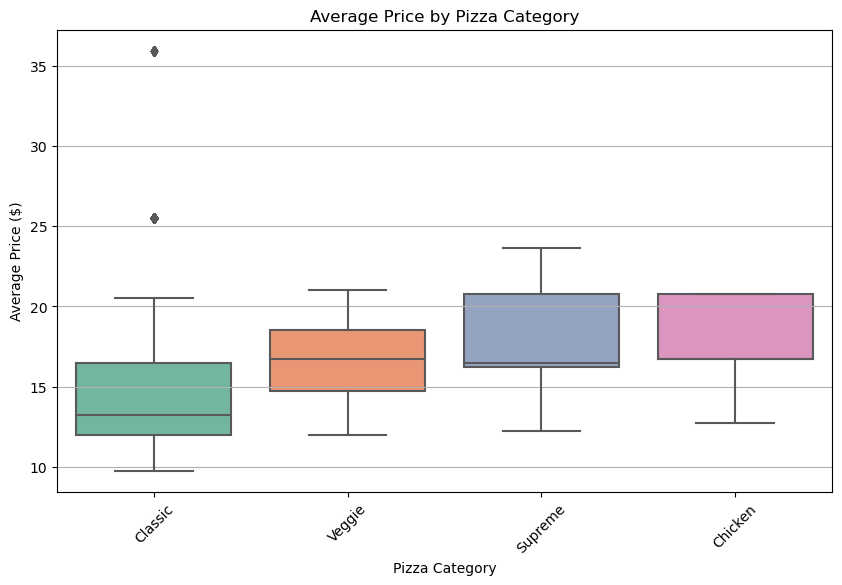

In [155]:
# Analysis on prices for each pizza category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pizza_category', y='unit_price', palette='Set2')
plt.title('Average Price by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

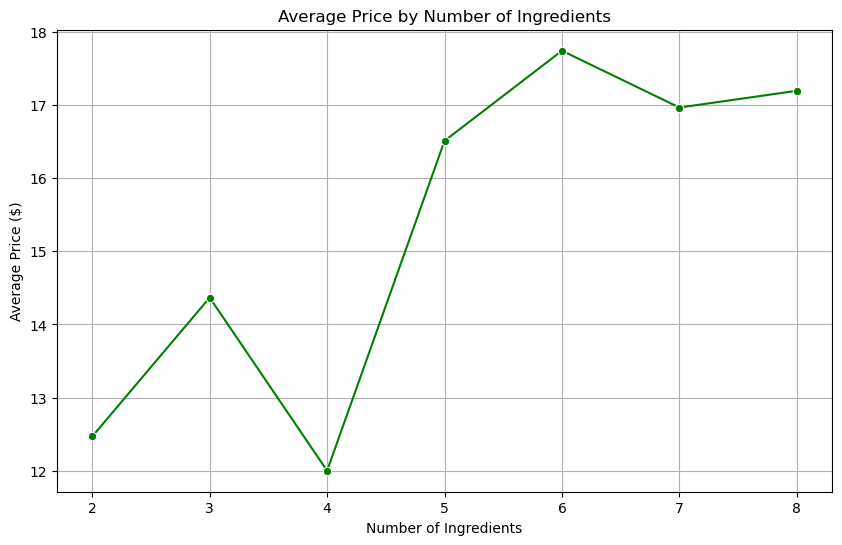

In [156]:
# Calculate the number of ingredients for each pizza
df['ingredients_count'] = df['pizza_ingredients'].apply(lambda x: len(x.split(',')))

# Group by ingredients count to see the relationship with average price
ingredients_price = df.groupby('ingredients_count').agg(
    average_price=('unit_price', 'mean')
).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=ingredients_price, x='ingredients_count', y='average_price', marker='o', color='green')
plt.title('Average Price by Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

#### Data Handle(feature engineering)

In [121]:
# Split the pizza_ingredients column by comma and convert to long format
pizza_ingredients_long = (pizza_pricing['pizza_ingredients']
                           .str.split(', ')
                           .explode()
                           .reset_index(drop=True))

# Count the number of occurrences of each ingredient
ingredient_counts = pizza_ingredients_long.value_counts()

# Print the number of unique ingredients
print('Number of unique ingredients:', len(ingredient_counts))

# Print the top 10 most common ingredients
print('\nTop 10 most common ingredients:')
print(ingredient_counts.head(10))

Number of unique ingredients: 66

Top 10 most common ingredients:
Garlic               59
Tomatoes             58
Red Onions           43
Red Peppers          30
Spinach              24
Mushrooms            21
Pepperoni            16
Mozzarella Cheese    15
Chicken              15
Artichokes           15
Name: pizza_ingredients, dtype: int64


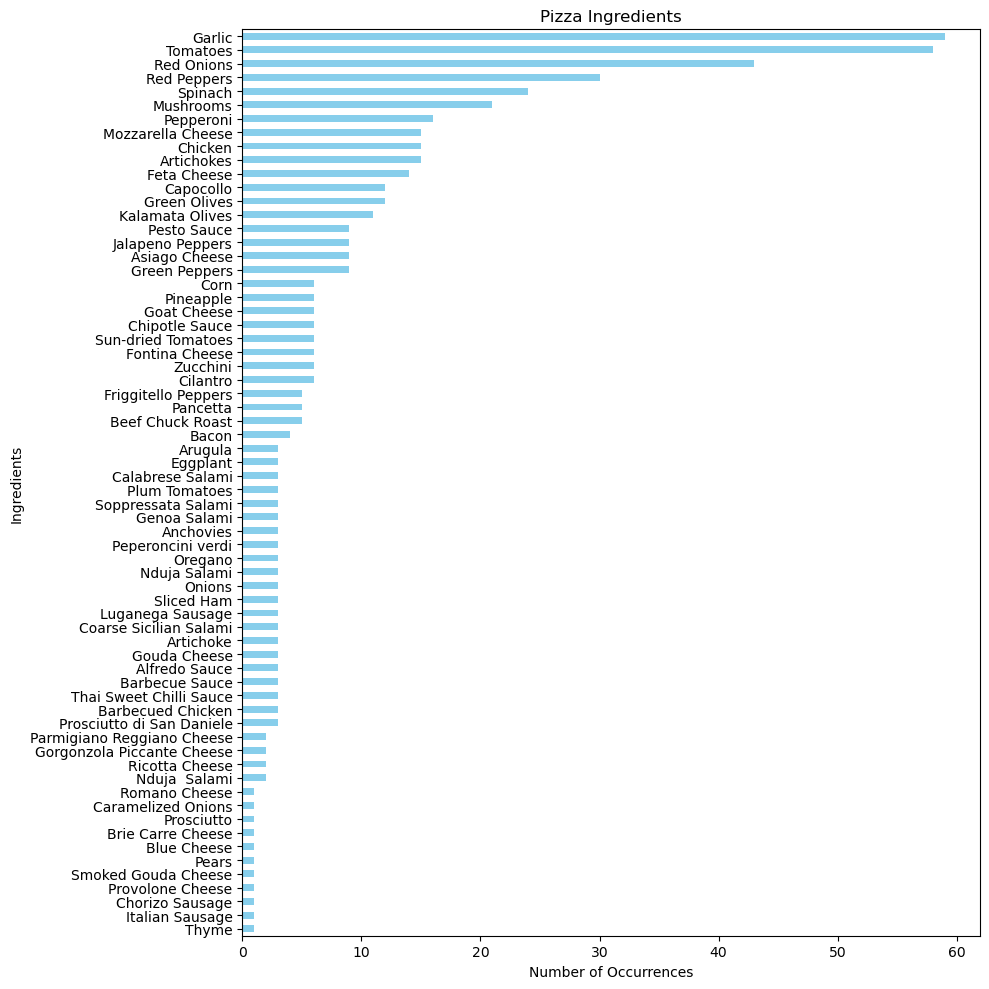

In [39]:
import matplotlib.pyplot as plt
# Draw a bar chart of ingredient quantity rankings
plt.figure(figsize=(10, 10))
ingredient_counts.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Ingredients')
plt.title('Pizza Ingredients')
plt.tight_layout()
plt.show()


In [34]:
#ingredient_counts.to_csv('data/ingredient_counts.csv')

In [128]:
vegetable_ingredients = [
    'Garlic', 'Tomatoes', 'Red Onions', 'Red Peppers', 'Spinach', 'Mushrooms', 'Artichokes',
    'Green Olives', 'Green Peppers', 'Jalapeno Peppers', 'Corn', 'Sun-dried Tomatoes',
    'Zucchini', 'Cilantro', 'Friggitello Peppers', 'Eggplant', 'Arugula', 'Peperoncini verdi',
    'Plum Tomatoes', 'Onions', 'Artichoke'
]
meat_ingredients = [
    'Pepperoni', 'Chicken', 'Capocollo', 'Bacon', 'Beef Chuck Roast', 'Pancetta',
    'Calabrese Salami', 'Barbecued Chicken', 'Prosciutto di San Daniele', 'Coarse Sicilian Salami',
    'Soppressata Salami', 'Luganega Sausage', 'Nduja Salami', 'Italian Sausage', 'Chorizo Sausage',
    'Prosciutto', 'Genoa Salami', 'Sliced Ham'
]
cheese_ingredients = [
    'Mozzarella Cheese', 'Feta Cheese', 'Asiago Cheese', 'Fontina Cheese', 'Goat Cheese', 'Gouda Cheese',
    'Parmigiano Reggiano Cheese', 'Gorgonzola Piccante Cheese', 'Ricotta Cheese', 'Provolone Cheese',
    'Smoked Gouda Cheese', 'Romano Cheese', 'Blue Cheese', 'Brie Carre Cheese'
]
special_ingredients = [
    'Pesto Sauce', 'Chipotle Sauce', 'Thai Sweet Chilli Sauce', 'Alfredo Sauce', 'Barbecue Sauce',
    'Oregano', 'Thyme', 'Caramelized Onions'
]
fruit_ingredients = [
    'Pineapple', 'Pears'
]
other_ingredients = [
    'Kalamata Olives', 'Anchovies'
]


def process_ingredients(row):
    ingredients = row['pizza_ingredients'].split(',')
    vegetable_count=sum(ingredient.strip() in vegetable_ingredients for ingredient in ingredients)
    meat_count = sum(ingredient.strip() in meat_ingredients for ingredient in ingredients)
    cheese_count=sum(ingredient.strip() in cheese_ingredients for ingredient in ingredients)
    special_ingredients_count = sum(ingredient.strip() in special_ingredients for ingredient in ingredients)
    fruit_ingredients_count = sum(ingredient.strip() in fruit_ingredients for ingredient in ingredients)
    other_ingredients_count = sum(ingredient.strip() in other_ingredients for ingredient in ingredients)
    return  vegetable_count,meat_count, cheese_count,special_ingredients_count,fruit_ingredients_count,other_ingredients_count

pizza_pricing[['meat_count', 'vegetable_count','cheese_count','special_ingredients_count','fruit_ingredients_count','other_ingredients_count']] =pizza_pricing.apply(process_ingredients, axis=1, result_type='expand')
dummies = pd.get_dummies(pizza_pricing[['pizza_size']], prefix='size')
price=pizza_pricing.drop(columns=['pizza_size','pizza_id', 'pizza_name','pizza_ingredients','pizza_category'])
price=pd.concat([price, dummies], axis=1)
price

,unit_price,meat_count,vegetable_count,cheese_count,special_ingredients_count,fruit_ingredients_count,other_ingredients_count,size_L,size_M,size_S,size_XL,size_XXL
77,9.75,0,1,1,0,0,0,0,0,1,0,0
93,10.50,0,1,1,0,1,0,0,0,1,0,0
127,11.00,2,1,0,0,0,0,0,0,1,0,0
19,12.00,7,0,0,1,0,0,0,0,1,0,0
35,12.00,0,4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3,20.75,4,2,0,0,0,0,1,0,0,0,0
175,21.00,6,0,0,1,0,0,1,0,0,0,0
427,23.65,1,1,1,2,1,0,0,0,1,0,0
121,25.50,3,1,1,0,0,1,0,0,0,1,0


In [129]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 77 to 3447
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unit_price                 93 non-null     float64
 1   meat_count                 93 non-null     int64  
 2   vegetable_count            93 non-null     int64  
 3   cheese_count               93 non-null     int64  
 4   special_ingredients_count  93 non-null     int64  
 5   fruit_ingredients_count    93 non-null     int64  
 6   other_ingredients_count    93 non-null     int64  
 7   size_L                     93 non-null     uint8  
 8   size_M                     93 non-null     uint8  
 9   size_S                     93 non-null     uint8  
 10  size_XL                    93 non-null     uint8  
 11  size_XXL                   93 non-null     uint8  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 6.3 KB


#### Split data and standardization

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
X=price.drop(columns=['unit_price'])
y=price['unit_price']

In [131]:
X.columns

Index(['meat_count', 'vegetable_count', 'cheese_count',
       'special_ingredients_count', 'fruit_ingredients_count',
       'other_ingredients_count', 'size_L', 'size_M', 'size_S', 'size_XL',
       'size_XXL'],
      dtype='object')

In [132]:
#Standardized numeric column

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['meat_count', 'vegetable_count', 'cheese_count',
                                   'special_ingredients_count', 'fruit_ingredients_count',
                                   'other_ingredients_count']])
X_scaled = pd.DataFrame(X_scaled, columns=['meat_count', 'vegetable_count', 'cheese_count',
                                           'special_ingredients_count', 'fruit_ingredients_count',
                                           'other_ingredients_count'],
                        index=X.index)

X_unscaled = X[['size_L', 'size_M', 'size_S', 'size_XL',
                'size_XXL']]

X_scaled = pd.concat([X_scaled, X_unscaled], axis=1)

X_scaled


,meat_count,vegetable_count,cheese_count,special_ingredients_count,fruit_ingredients_count,other_ingredients_count,size_L,size_M,size_S,size_XL,size_XXL
77,-1.886050,0.080582,0.345043,-0.641756,-0.285299,-0.420969,0,0,1,0,0
93,-1.886050,0.080582,0.345043,-0.641756,3.505098,-0.420969,0,0,1,0,0
127,-0.813251,0.080582,-0.761473,-0.641756,-0.285299,-0.420969,0,0,1,0,0
19,1.868747,-1.168443,-0.761473,1.416290,-0.285299,-0.420969,0,0,1,0,0
35,-1.886050,3.827659,-0.761473,-0.641756,-0.285299,-0.420969,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3,0.259548,1.329608,-0.761473,-0.641756,-0.285299,-0.420969,1,0,0,0,0
175,1.332347,-1.168443,-0.761473,1.416290,-0.285299,-0.420969,1,0,0,0,0
427,-1.349651,0.080582,0.345043,3.474336,3.505098,-0.420969,0,0,1,0,0
121,-0.276851,0.080582,0.345043,-0.641756,-0.285299,2.375470,0,0,0,1,0


In [133]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### RandomForestRegressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [99]:
# Define the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # tree mounts
    'max_depth': [None, 10, 20, 30],  # tree deepth
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at leaf nodes
}
# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Training the model
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Predicting and evaluating the model
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'r2_score: {r2}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 5.485101538028678
r2_score: 0.6082880448545642


#### GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [100]:
gbr_model = GradientBoostingRegressor(random_state=42)
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # tree mounts
    'max_depth': [3, 4, 5],  # tree deepth
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required at leaf nodes
}
# GridSearchCV
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# Training the model
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'r2_score: {r2}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 4.754302134234593
r2_score: 0.6604772087733385


####  RidgeRegression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
Ridge_model = Ridge(random_state=42)

#Define parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Different values of regularization strength
}
#GridSearchCV
grid_search = GridSearchCV(estimator=Ridge_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
#Train model
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'r2_score: {r2}')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'alpha': 0.1}
Mean Squared Error: 4.795180960153753
r2_score: 0.6575578963934625


####  XGBRegressor

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [134]:
xgb_model = XGBRegressor(random_state=42)
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# Training the model
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'r2_score: {r2}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error: 4.357120018810628
r2_score: 0.6888414937191805


In [135]:
# Save the model predictions and the actual prices to a DataFrame
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Reset the index for a cleaner look
results_df.reset_index(drop=True, inplace=True)

results_df.head(10)

,Actual Price,Predicted Price
0,16.00,16.021729
1,12.50,12.260967
2,16.75,16.020365
3,20.50,20.242477
4,9.75,9.575288
5,12.75,12.736819
6,16.00,16.043657
7,20.25,20.306557
8,12.00,12.036386
9,16.25,16.249842


Feature Importances:
meat_count: 0.0100
vegetable_count: 0.0011
cheese_count: 0.0016
special_ingredients_count: 0.0035
fruit_ingredients_count: 0.0005
other_ingredients_count: 0.0096
size_L: 0.0271
size_M: 0.1481
size_S: 0.6106
size_XL: 0.0187
size_XXL: 0.1691



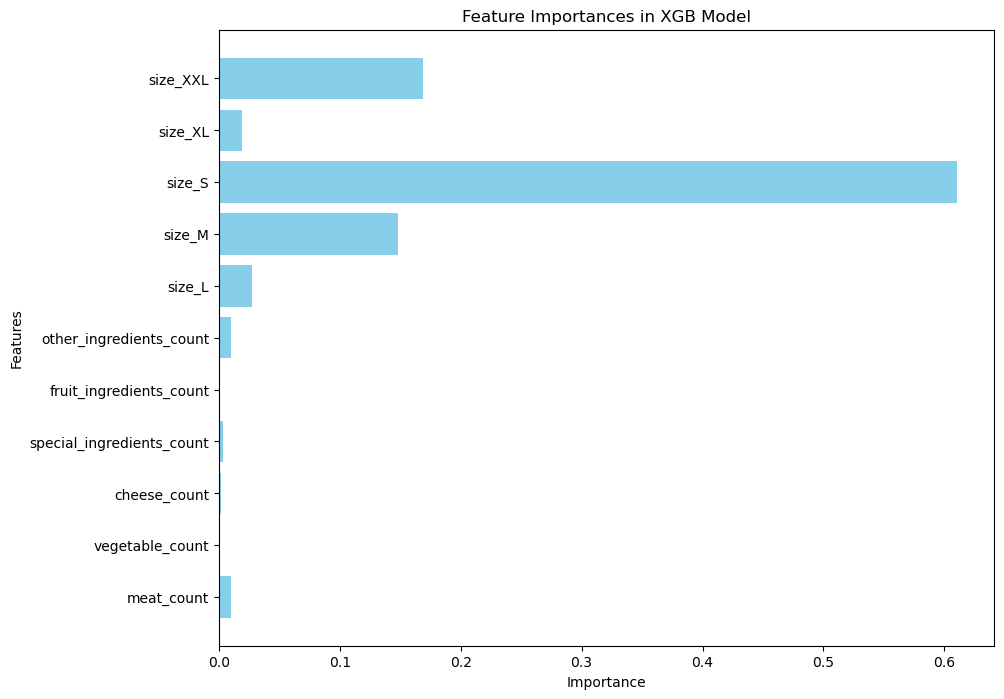

In [136]:
# Display the characteristic coefficients of the best model
best_xgb_model = grid_search.best_estimator_
features = X_train.columns

# Get feature importance of XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Construct a string representation of feature importance
importance_str = "Feature Importances:\n"
for i, importance in enumerate(feature_importances):
    importance_str += f"{features[i]}: {importance:.4f}\n"
print(importance_str)

# Visualizing feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in XGB Model')
plt.show()

The best performer is XGBRegressor:

We can see the relative measure of each feature's contribution to the model's predictive ability. Size features (such as size_S, size_M, size_XXL) have the greatest contribution to predicting pizza prices, especially the size_S feature, whose feature importance is much higher than other features. It shows that the price change of small-sized pizza has the greatest impact on the prediction of the model compared with other sizes.


The importance of ingredient category features (meat_count, vegetable_count, etc.) is generally low, which means that the number of different types of ingredients contributes less to predicting pizza price compared to size. But among these features, meat_count and other_ingredients_count are relatively more important, which may indicate that the quantity of meat ingredients and other unconventional ingredients affects the price to a certain extent.

## prediction

In [146]:
import numpy as np

# set a new data example
new_data_example = pd.DataFrame({
    'meat_count': [4],
    'vegetable_count': [2],
    'cheese_count': [2],
    'special_ingredients_count': [2],
    'fruit_ingredients_count': [1],
    'other_ingredients_count': [0],
    'size_L': [0],
    'size_M': [0],
    'size_S': [1],
    'size_XL': [0],
    'size_XXL': [0]
}, index=[0])
# Fit model
predicted_price = grid_search.predict(new_data_example)
# Use MAE to calculate the price range
mae = mean_absolute_error(y_test, y_pred)
price_range_lower = predicted_price - mae
price_range_upper = predicted_price + mae
# Convert numerical values to strings for printing
predicted_price_str = str(predicted_price[0]) if isinstance(predicted_price, np.ndarray) else str(predicted_price)
price_range_lower_str = str(price_range_lower[0]) if isinstance(price_range_lower, np.ndarray) else str(price_range_lower)
price_range_upper_str = str(price_range_upper[0]) if isinstance(price_range_upper, np.ndarray) else str(price_range_upper)
# Print the predicted price and its range
print("Predicted price is: " + predicted_price_str)
print("Range of predicted prices is: [" + price_range_lower_str + ":" + price_range_upper_str + "]")

Predicted price is: 12.781365
Range of predicted prices is: [12.073126:13.489605]


# EDA for menu and order analysis

## menu(for Launch the top 30 best-selling pizza products and launch set menus)

In [180]:
import plotly.express as px
unique_pizzas = df[['pizza_category', 'pizza_name', 'pizza_size', 'pizza_id']].drop_duplicates()
sorted_unique_pizzas = unique_pizzas.sort_values(by=['pizza_category', 'pizza_name', 'pizza_size'])
fig = px.bar(sorted_unique_pizzas, x='pizza_name', y='pizza_size', color='pizza_category',
             title="Pizza Sizes and Categories",
             hover_data=['pizza_id'])

fig.show()

In [183]:
# Grouping by 'pizza_category' and calculating unique counts for 'pizza_size' and 'pizza_name'
category_summary = df.groupby('pizza_category').agg({
    'pizza_size': 'nunique',
    'pizza_name': 'nunique'
}).reset_index()

# Renaming columns for clarity
category_summary.columns = ['Pizza Category', 'Unique Sizes', 'Unique Pizza Names']

# Display the summary table
print(category_summary)

  Pizza Category  Unique Sizes  Unique Pizza Names
0        Chicken             3                   6
1        Classic             5                   8
2        Supreme             3                   9
3         Veggie             3                   9


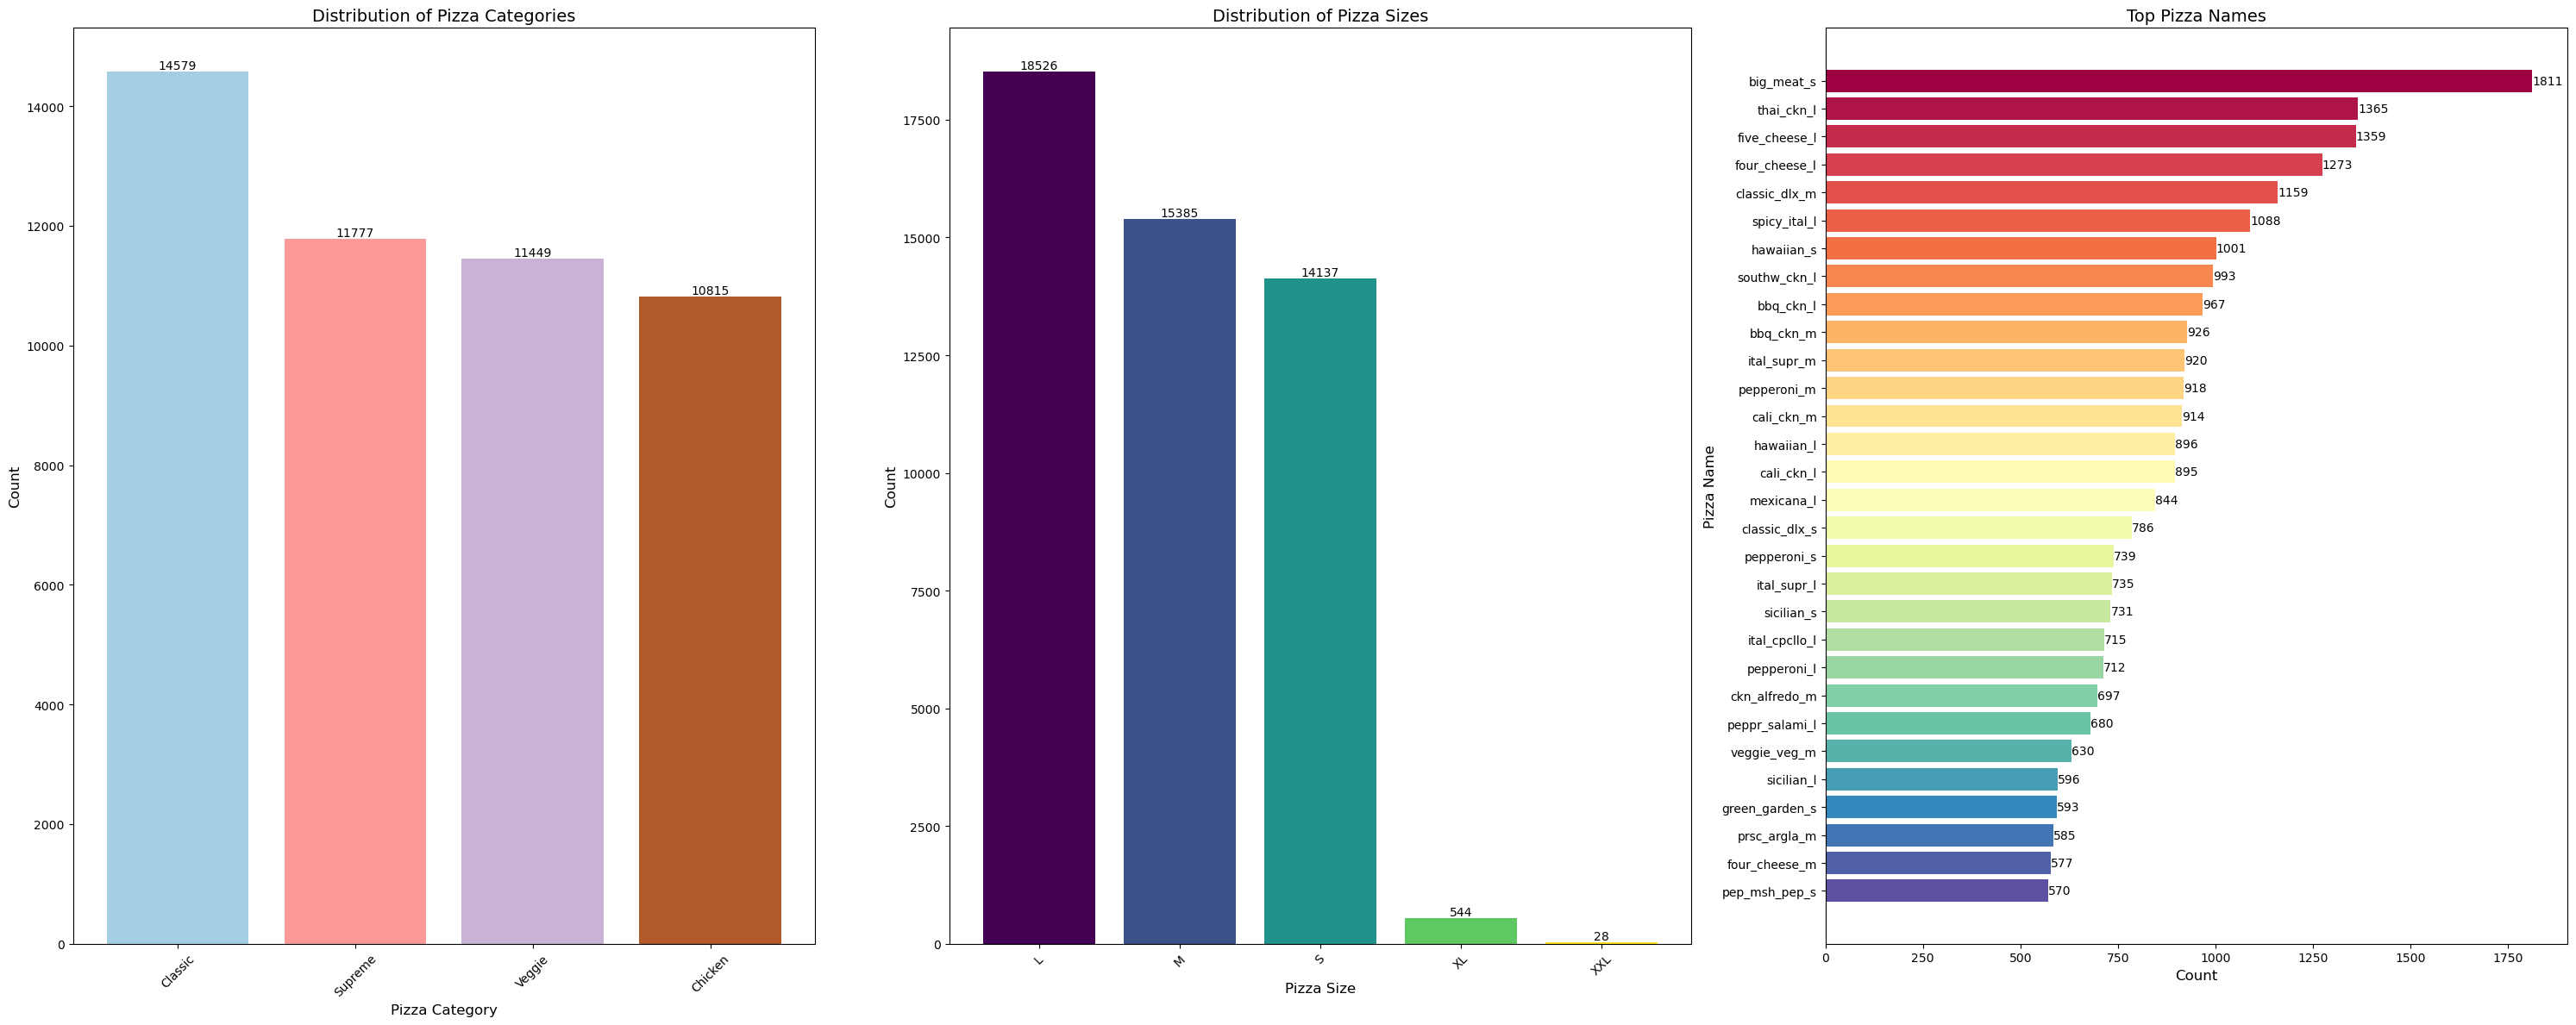

In [187]:
import numpy as np

pizza_category_counts = df['pizza_category'].value_counts()
pizza_size_counts = df['pizza_size'].value_counts()
N = 30
top_pizza_names = df['pizza_id'].value_counts().head(N)
# Setup for subplots - 1 row, 3 columns, with improved spacing
fig, axes = plt.subplots(1, 3, figsize=(30, 12), dpi=100)

# Colormap setup
category_cmap = plt.get_cmap('Paired')
size_cmap = plt.get_cmap('viridis')
name_cmap = plt.get_cmap('Spectral')

# Improved Plot for Pizza Category
category_colors = category_cmap(np.linspace(0, 1, len(pizza_category_counts)))
axes[0].bar(pizza_category_counts.index, pizza_category_counts.values, color=category_colors)
axes[0].set_title('Distribution of Pizza Categories', fontsize=14)
axes[0].set_xlabel('Pizza Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Improved Plot for Pizza Size
size_colors = size_cmap(np.linspace(0, 1, len(pizza_size_counts)))
axes[1].bar(pizza_size_counts.index, pizza_size_counts.values, color=size_colors)
axes[1].set_title('Distribution of Pizza Sizes', fontsize=14)
axes[1].set_xlabel('Pizza Size', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Improved Plot for Pizza Name - Using a horizontal bar chart
name_colors = name_cmap(np.linspace(0, 1, len(top_pizza_names)))
axes[2].barh(top_pizza_names.index, top_pizza_names.values, color=name_colors)
axes[2].set_title('Top Pizza Names', fontsize=14)
axes[2].set_xlabel('Count', fontsize=12)
axes[2].set_ylabel('Pizza Name', fontsize=12)
axes[2].invert_yaxis()  # Invert y-axis to have the highest value on top
axes[2].tick_params(axis='y', labelsize=10)
axes[2].tick_params(axis='x', labelsize=10)

# Adding value labels to each plot
for ax in axes[:2]:  # For the first two vertical bar charts
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height()}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black')

# Adding value labels to the horizontal bar chart
for bar in axes[2].containers[0]:
    axes[2].annotate(f'{bar.get_width()}',
                     (bar.get_width(), bar.get_y() + bar.get_height()/2),
                     ha='left', va='center',
                     fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [188]:
popular_pizzas = df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False)
popular_pizzas.head(30)

pizza_id
big_meat_s        1914
thai_ckn_l        1410
five_cheese_l     1409
four_cheese_l     1316
classic_dlx_m     1181
spicy_ital_l      1109
hawaiian_s        1020
southw_ckn_l      1016
bbq_ckn_l          992
bbq_ckn_m          956
cali_ckn_m         944
ital_supr_m        941
pepperoni_m        939
cali_ckn_l         927
hawaiian_l         919
mexicana_l         867
classic_dlx_s      799
pepperoni_s        751
sicilian_s         751
ital_supr_l        747
ital_cpcllo_l      732
pepperoni_l        728
ckn_alfredo_m      703
peppr_salami_l     696
veggie_veg_m       635
sicilian_l         613
green_garden_s     600
prsc_argla_m       598
four_cheese_m      586
pep_msh_pep_s      578
Name: quantity, dtype: int64

In [176]:
# Display the top 30 most popular pizzas
top_30_pizzas_details = df[df['pizza_id'].isin(popular_pizzas.head(30).index)]
top_30_pizzas_unique_details = top_30_pizzas_details[['pizza_id', 'pizza_name', 'pizza_size', 'pizza_category','pizza_ingredients']].drop_duplicates()
top_30_pizzas_unique_details.head()

,pizza_id,pizza_name,pizza_size,pizza_category,pizza_ingredients
1,classic_dlx_m,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,five_cheese_l,The Five Cheese Pizza,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,ital_supr_l,The Italian Supreme Pizza,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
5,thai_ckn_l,The Thai Chicken Pizza,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,ital_supr_m,The Italian Supreme Pizza,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."


In [175]:
#top_30_pizzas_unique_details.to_csv('data/top_30_menu')

In [184]:
top_30_pizzas_unique_details['pizza_category'].value_counts()

Classic    10
Supreme     7
Chicken     7
Veggie      6
Name: pizza_category, dtype: int64

**association analysis**

In [185]:
orders = df.groupby('order_id')['pizza_id'].apply(list).tolist()
orders[:5]

[['hawaiian_m'],
 ['classic_dlx_m', 'five_cheese_l', 'ital_supr_l', 'mexicana_m', 'thai_ckn_l'],
 ['ital_supr_m', 'prsc_argla_l'],
 ['ital_supr_m'],
 ['ital_supr_m']]

In [ ]:
!pip install mlxtend

In [186]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
encoded_matrix = encoder.fit_transform(orders)
encoded_df = pd.DataFrame(encoded_matrix, columns=encoder.columns_)

frequent_itemsets = apriori(encoded_df, min_support=0.005, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filtering for combinations with high confidence
rules.sort_values(by='confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(thai_ckn_l),(big_meat_s),0.063934,0.084824,0.006745,0.105495,1.243682,0.001322,1.023108,0.209318
3,(four_cheese_l),(big_meat_s),0.059625,0.084824,0.005902,0.098979,1.166868,0.000844,1.015709,0.152072
1,(five_cheese_l),(big_meat_s),0.063653,0.084824,0.005855,0.091979,1.084351,0.000455,1.007880,0.083078
4,(big_meat_s),(thai_ckn_l),0.084824,0.063934,0.006745,0.079514,1.243682,0.001322,1.016925,0.214096
2,(big_meat_s),(four_cheese_l),0.084824,0.059625,0.005902,0.069575,1.166868,0.000844,1.010694,0.156259
0,(big_meat_s),(five_cheese_l),0.084824,0.063653,0.005855,0.069023,1.084351,0.000455,1.005767,0.085000


The maximum min_support is 0.005, because most orders only buy one kind of pizza.

There are 4 types,5 sizes, 32 pizza names, and a total of 91 combinations on sale, including:
There are 6 kinds of chicken in 3 sizes; 8 kinds of classic in 5 sizes; 9 kinds of supreme in 3 sizes; 9 kinds of veggie in 3 sizes.

**The best-selling items are classic and L-size pizzas. **

According to the visual analysis results, we can get the menu of the pizza store (the top 30 sales, the number of menus can be changed according to the store plan)

According to the correlation analysis results, we found that most orders only purchase one kind of pizza, so we can launch some matching meals based on the actual situation, such as:
**pairing a smaller meat pizza with larger specialty or cheesy pizzas**, Or launch some other drinks and desserts (due to lack of data, no correlation analysis has been conducted on products other than pizza for the time being).

Promote customer spending by offering bundled offers or promotions.




## Order(for Business hours and Number of meals to prepare )

In [189]:
# Calculate the count of items and total price per order_id
items_count_per_order = df.groupby('order_id')['quantity'].sum()
total_price_per_order = df.groupby('order_id')['total_price'].sum()

# Get a list of unique pizzas per order_id
pizzas_per_order = df.groupby('order_id')['pizza_id'].unique()

# Since we can't directly execute the code, I'll describe how you could merge these results for a comprehensive view
results_df = pd.DataFrame({
    'Items_Count': items_count_per_order,
    'Total_Price': total_price_per_order,
    'Pizzas': pizzas_per_order
})

# Displaying a sample of the merged results
results_df.sort_values(by='Items_Count', ascending=False)

,Items_Count,Total_Price,Pizzas
order_id,,,
18845,28,444.20,"[bbq_ckn_m, big_meat_s, calabrese_m, ckn_alfre..."
10760,25,417.15,"[big_meat_s, brie_carre_s, cali_ckn_l, ckn_alf..."
18513,15,257.00,"[bbq_ckn_m, bbq_ckn_s, big_meat_s, calabrese_l..."
21158,15,243.50,"[bbq_ckn_m, big_meat_s, cali_ckn_l, ckn_pesto_..."
20163,15,232.50,"[cali_ckn_m, green_garden_s, hawaiian_s, ital_..."
...,...,...,...
10393,1,15.25,[pepperoni_l]
10394,1,20.75,[soppressata_l]
10395,1,12.00,[green_garden_s]


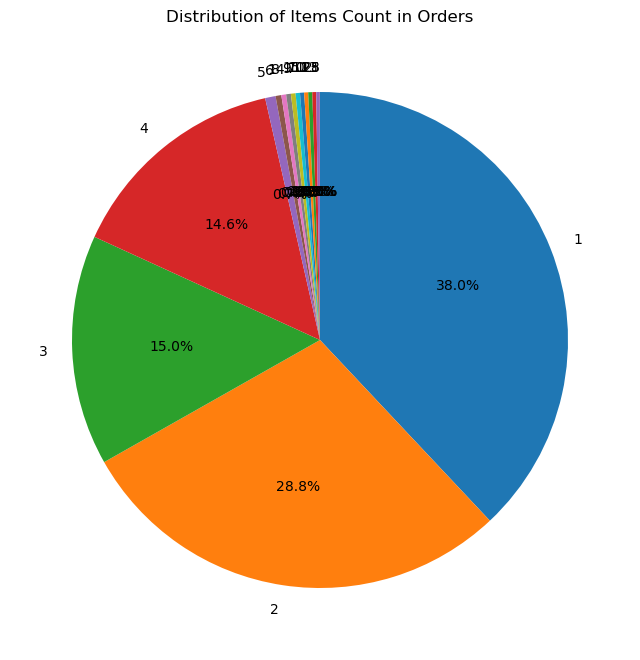

In [192]:
items_count_distribution = results_df['Items_Count'].value_counts()

# Plotting the distribution as a pie chart
plt.figure(figsize=(8, 15))
plt.pie(items_count_distribution, labels=items_count_distribution.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Items Count in Orders')

plt.show()

In [193]:
df['datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'].astype(str))
df.drop(['order_date', 'order_time'],axis=1,inplace=True)
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [200]:
busiest_days=df['day_of_week'].value_counts().sort_values(ascending=False)
busiest_hours=df['hour'].value_counts().sort_values(ascending=False)

d:\software\anaconda\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

d:\software\anaconda\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



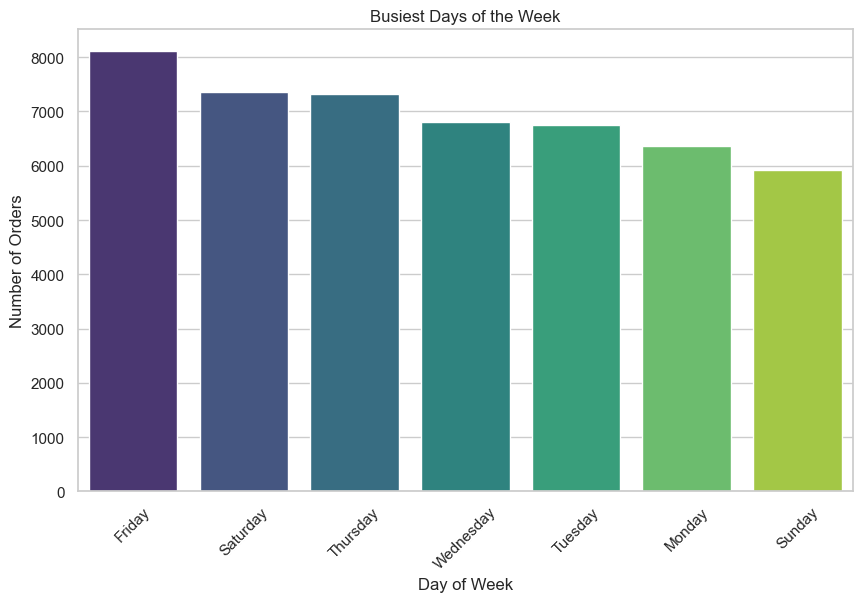

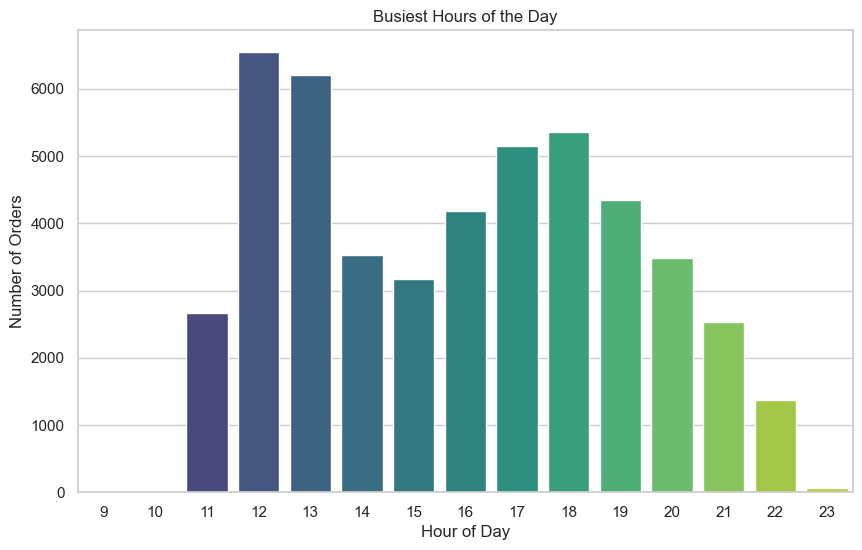

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# show busiest_days
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_days.index, y=busiest_days.values, palette='viridis')
plt.title('Busiest Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  
plt.show()

# show busisest_hours
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_hours.index, y=busiest_hours.values, palette='viridis')
plt.title('Busiest Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()


Peak periods:

 Friday, Thursday and Saturday, especially lunchtime (12pm and 1pm) and dinner time (5pm to 7pm)

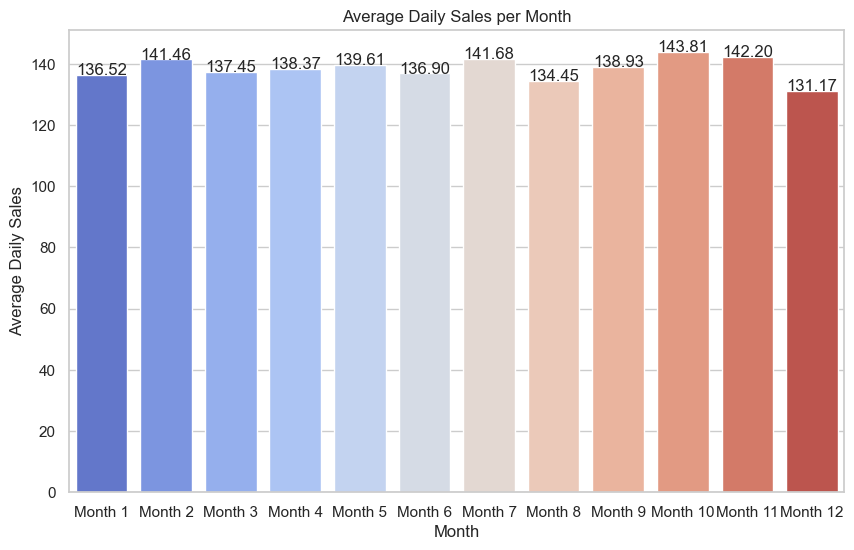

In [202]:
df['date'] = df['datetime'].dt.date  
df['month'] = df['datetime'].dt.month 
month_sales = df.groupby('month')['quantity'].sum()
days_per_month = df.groupby('month')['date'].nunique()
monthly_average_sales = month_sales / days_per_month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_average_sales.index, y=monthly_average_sales.values, palette='coolwarm')
plt.title('Average Daily Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Sales')
plt.xticks(ticks=range(len(monthly_average_sales)), labels=[f'Month {i+1}' for i in range(len(monthly_average_sales))])
for index, value in enumerate(monthly_average_sales):
    plt.text(index, value, f'{value:.2f}', ha='center')

plt.show()

In [203]:
monthly_average_sales.sum()/12

138.54589022586336

An average of about 138 orders per day

In [205]:
peak_hours = busiest_hours.index[:3]
peak_orders = df[df['hour'].isin(peak_hours)]
orders_sum_during_peak = peak_orders.groupby('hour')['quantity'].sum()/365
average_orders_during_peak = orders_sum_during_peak.mean()
print(orders_sum_during_peak)
print("Average orders during peak hours:", average_orders_during_peak)

nopeak_hours = busiest_hours.index[4:]
nopeak_hours = df[df['hour'].isin(nopeak_hours)]
orders_sum_during_nopeak = nopeak_hours.groupby('hour')['quantity'].sum()/365
average_orders_during_nopeak = orders_sum_during_nopeak.mean()
print(orders_sum_during_nopeak)
print("Average orders during non-peak hours:", average_orders_during_nopeak)

hour
12    18.564384
13    17.569863
18    14.841096
Name: quantity, dtype: float64
Average orders during peak hours: 16.99178082191781
hour
9      0.010959
10     0.049315
11     7.473973
14     9.898630
15     8.810959
16    11.613699
19    12.071233
20     9.682192
21     6.972603
22     3.797260
23     0.186301
Name: quantity, dtype: float64
Average orders during non-peak hours: 6.415193026151931


d:\software\anaconda\lib\site-packages\pandas\core\algorithms.py:516: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

d:\software\anaconda\lib\site-packages\pandas\core\algorithms.py:516: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



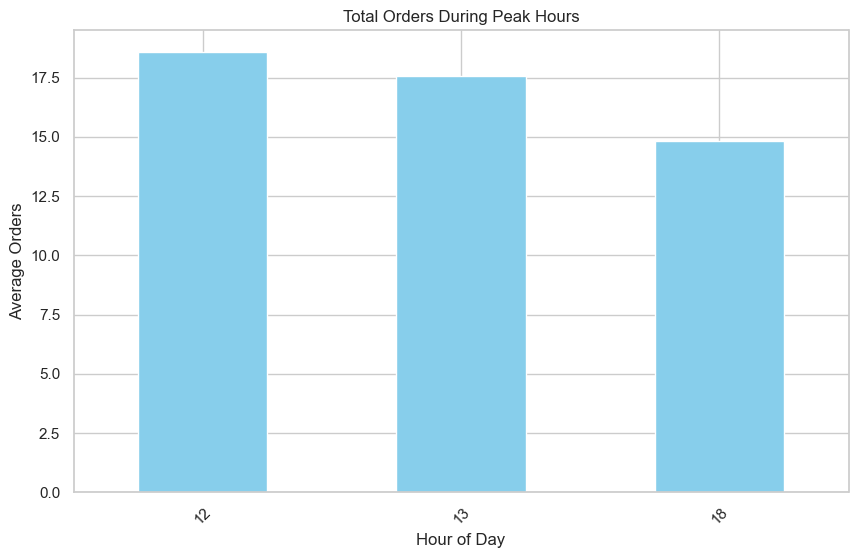

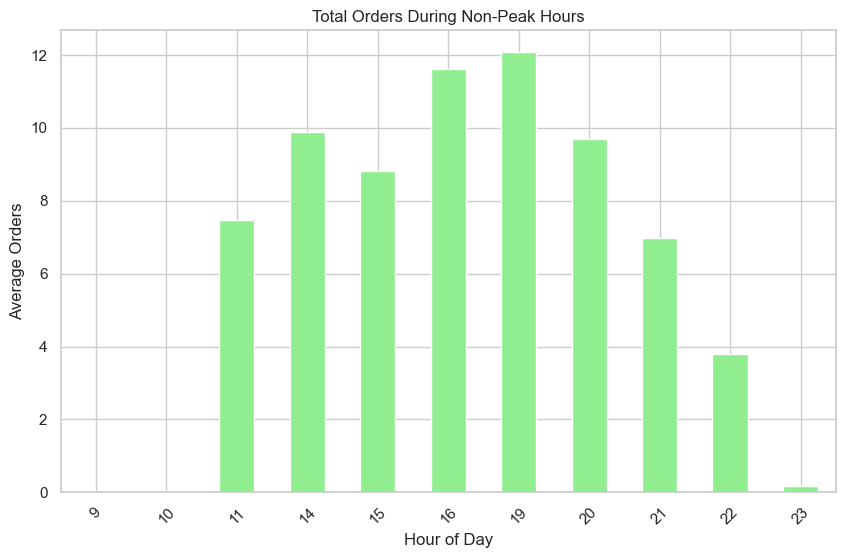

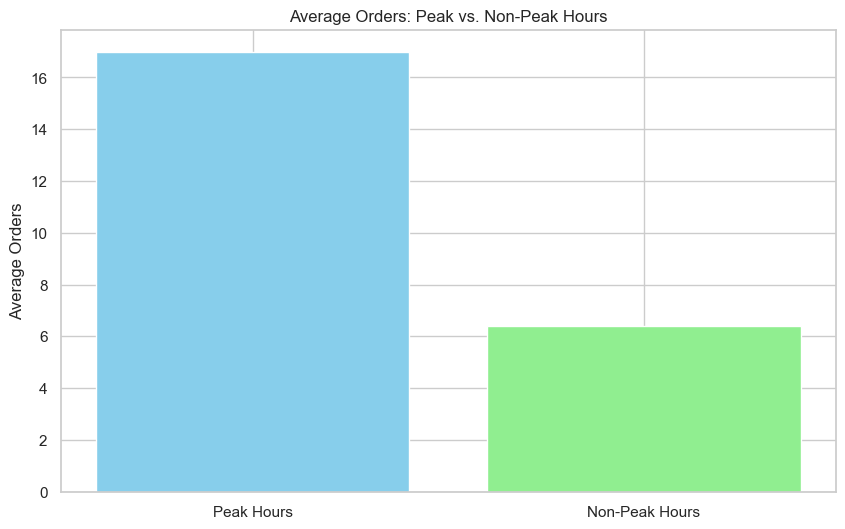

In [206]:
import matplotlib.pyplot as plt

# Visualize the total number of orders during peak hours
plt.figure(figsize=(10, 6))
orders_sum_during_peak.plot(kind='bar', color='skyblue')
plt.title('Total Orders During Peak Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)
plt.show()

# Visualize the total number of orders during off-peak hours
plt.figure(figsize=(10, 6))
orders_sum_during_nopeak.plot(kind='bar', color='lightgreen')
plt.title('Total Orders During Non-Peak Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)
plt.show()

# Compare average number of orders during peak and off-peak hours
plt.figure(figsize=(10, 6))
plt.bar(['Peak Hours', 'Non-Peak Hours'], [average_orders_during_peak, average_orders_during_nopeak], color=['skyblue', 'lightgreen'])
plt.ylabel('Average Orders')
plt.title('Average Orders: Peak vs. Non-Peak Hours')
plt.show()


The average number of orders during peak periods is around 17 orders/hour. 

The average number of orders during off-peak periods is around 6 orders/hour. 

The average customer order volume at 9:00 am, 10:00 am and 23:00 pm is close to zero. Perhaps the business hours can be adjusted to: 11:00 to 22:00.

# strategies

**1. Pricing Forecast**

According to the size, size and ingredients, customized prices are provided for merchants’ reference.

**2. Customized menu**

Provide hot-selling pizza and ingredient list.

Guide the launch of menu offer combinations.

**3. Operation and maintenance**

Optimize business hours, Perhaps the business hours can be adjusted to: 11:00 to 22:00.

and launch takeout preferential policies during peak periods.

Optimizing inventory management, daily orders are expected to be around 138, which can be adjusted according to actual conditions.